In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance

from hnmchallenge.constant import *
from hnmchallenge.data_reader import DataReader

from hnmchallenge.evaluation.python_evaluation import map_at_k, recall_at_k
from hnmchallenge.feature_manager import FeatureManager
from hnmchallenge.datasets.last_week_last_week import LWLWDataset
from hnmchallenge.datasets.last_month_last_week_dataset import LMLWDataset
from hnmchallenge.datasets.last_month_last_day import LMLDDataset
from hnmchallenge.models.itemknn.itemknn import ItemKNN


/raid/home/edoardo/GitProjects/HnMChallenge/.venv/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
dataset = LMLDDataset()
dr = DataReader()

In [3]:
base_load_path = dataset._DATASET_PATH / "xgb_models"

In [4]:
VERSION = 0
DATASET = f"dataset_v101_{VERSION}.feather"
MODEL_NAME = f"xgb_{DATASET}.json"

In [5]:
model = xgb.XGBRanker()
model.load_model(base_load_path/MODEL_NAME)

In [6]:
from xgboost import plot_importance

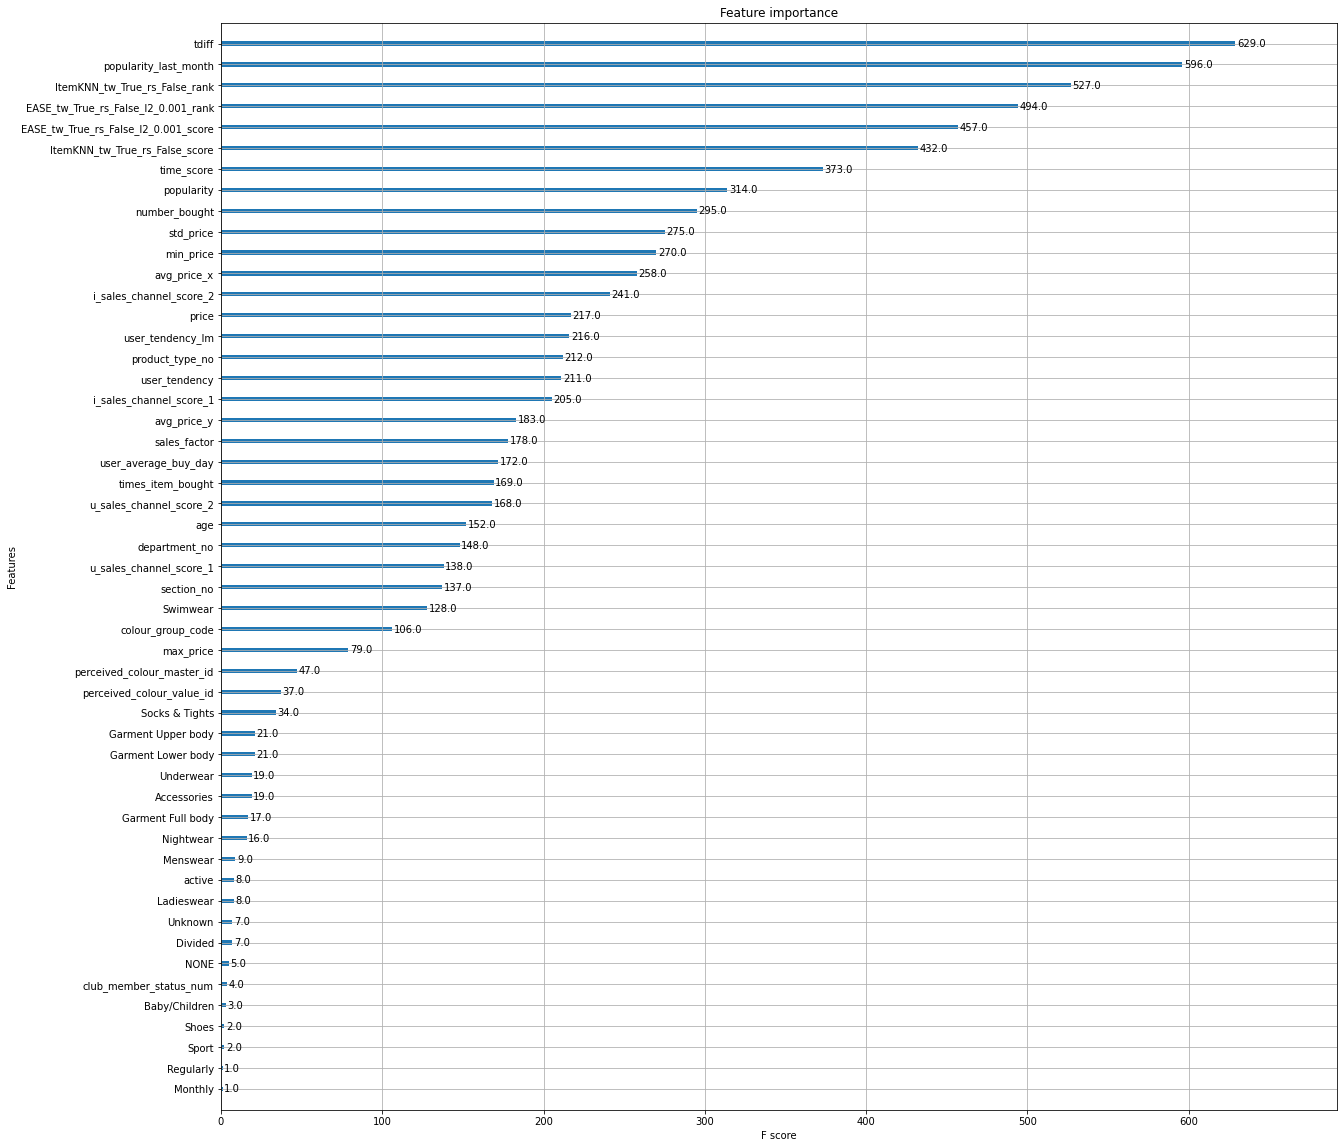

In [7]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_importance(model, ax=ax)
plt.show()

In [8]:
model.best_ntree_limit

249

In [9]:
features = pd.read_feather(dataset._DATASET_PATH / f"dataset_dfs/full/{DATASET}")

# Remember to use the bert_ntree_limit when taking the predictions

In [10]:
features.head()

,customer_id,EASE_tw_True_rs_False_l2_0.001_score,EASE_tw_True_rs_False_l2_0.001_rank,ItemKNN_tw_True_rs_False_score,ItemKNN_tw_True_rs_False_rank,article_id,colour_group_code,i_sales_channel_score_2,i_sales_channel_score_1,department_no,...,Regularly,avg_price_y,user_tendency,user_tendency_lm,user_average_buy_day,u_sales_channel_score_2,u_sales_channel_score_1,time_score,tdiff,times_item_bought
0,0,0.002396,1.0,0.007984,2.0,2067.0,9,0.846024,0.153976,1747,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,1.000000,0.004855,1.0
1,0,NaN,NaN,0.005772,7.0,14497.0,9,0.997639,0.002361,1676,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,1.000000,0.004855,1.0
2,0,NaN,NaN,0.005725,8.0,2445.0,9,0.982984,0.017016,1338,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,0.664921,0.001472,2.0
3,0,NaN,NaN,0.005212,9.0,0.0,9,0.847219,0.152781,1643,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,0.000000,0.000000,3.0
4,0,NaN,NaN,0.004718,10.0,9044.0,9,0.832669,0.167331,1648,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,1.000000,0.004855,1.0


In [11]:
customer_article_df = features[[DEFAULT_USER_COL, DEFAULT_ITEM_COL]].copy()
X = features.drop([DEFAULT_USER_COL, DEFAULT_ITEM_COL], axis=1)

In [12]:
X.head()

,EASE_tw_True_rs_False_l2_0.001_score,EASE_tw_True_rs_False_l2_0.001_rank,ItemKNN_tw_True_rs_False_score,ItemKNN_tw_True_rs_False_rank,colour_group_code,i_sales_channel_score_2,i_sales_channel_score_1,department_no,Baby/Children,Divided,...,Regularly,avg_price_y,user_tendency,user_tendency_lm,user_average_buy_day,u_sales_channel_score_2,u_sales_channel_score_1,time_score,tdiff,times_item_bought
0,0.002396,1.0,0.007984,2.0,9,0.846024,0.153976,1747,0,1,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,1.000000,0.004855,1.0
1,NaN,NaN,0.005772,7.0,9,0.997639,0.002361,1676,0,0,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,1.000000,0.004855,1.0
2,NaN,NaN,0.005725,8.0,9,0.982984,0.017016,1338,0,0,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,0.664921,0.001472,2.0
3,NaN,NaN,0.005212,9.0,9,0.847219,0.152781,1643,0,1,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,0.000000,0.000000,3.0
4,NaN,NaN,0.004718,10.0,9,0.832669,0.167331,1648,0,0,...,0,0.026973,0.2,NaN,95.5,1.0,0.0,1.000000,0.004855,1.0


In [13]:
y_pred = model.predict(X, ntree_limit=model.best_ntree_limit)

/raid/home/edoardo/GitProjects/HnMChallenge/.venv/lib/python3.9/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/raid/home/edoardo/GitProjects/HnMChallenge/.venv/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [14]:
customer_article_df["predicted_score"] = y_pred

In [15]:
customer_article_df

,customer_id,article_id,predicted_score
0,0,2067.0,4.046126
1,0,14497.0,-1.142180
2,0,2445.0,-3.137958
3,0,0.0,-3.115937
4,0,9044.0,-0.516874
...,...,...,...
198934439,1371979,68.0,-1.312902
198934440,1371979,467.0,-4.161385
198934441,1371979,146.0,-3.251539
198934442,1371979,3523.0,-3.513790


In [16]:
sorted_scores = customer_article_df.sort_values([DEFAULT_USER_COL, "predicted_score"], ascending=[True, False])

In [17]:
sorted_scores

,customer_id,article_id,predicted_score
0,0,2067.0,4.046126
101,0,1871.0,3.747708
102,0,2257.0,3.565982
103,0,1971.0,2.686304
104,0,1880.0,2.635201
...,...,...,...
198934391,1371979,581.0,-4.906276
198934349,1371979,477.0,-4.911892
198934420,1371979,3294.0,-4.958818
198934436,1371979,2015.0,-4.979928


In [18]:
sorted_scores_index = sorted_scores.reset_index(drop=True)

In [19]:
cutoff = sorted_scores_index.groupby(DEFAULT_USER_COL).size().values
i=0 
filter_indices = []
for cut in cutoff:
    filter_indices.extend(range(i, i+12))
    i=i+cut

In [20]:
cutoff.mean()

144.99806411172173

In [21]:
filter_indices

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 468,
 469,
 470,
 471,
 472,
 473,
 474,
 475,
 476,
 477,
 478,
 479,
 612,
 613,
 614,
 615,
 616,
 617,
 618,
 619,
 620,
 621,
 622,
 623,
 760,
 761,
 762,
 763,
 764,
 765,
 766,
 767,
 768,
 769,
 770,
 771,
 897,
 898,
 899,
 900,
 901,
 902,
 903,
 904,
 905,
 906,
 907,
 908,
 1051,
 1052,
 1053,
 1054,
 1055,
 1056,
 1057,
 1058,
 1059,
 1060,
 1061,
 1062,
 1198,
 1199,
 1200,
 1201,
 1202,
 1203,
 1204,
 1205,
 1206,
 1207,
 1208,
 1209,
 1358,
 1359,
 1360,
 1361,
 1362,
 1363,
 1364,
 1365,
 1366,
 1367,
 1368,
 1369,
 1513,
 1514,
 1515,
 1516,
 1517,
 1518,
 1519,
 1520,
 1521,
 1522,
 1523,
 1524,
 1655,
 1656,
 1657,
 1658,
 1659,
 1660,
 1661,
 1662,
 1663,
 1664,
 1665,
 1666,
 1810,
 1811,
 1812,
 1813,
 1814,
 1815,
 1816,
 1817,
 1818,
 1819,
 1820,
 1821,
 1976,
 1977,


In [22]:
final_df = sorted_scores_index.loc[filter_indices]

In [23]:
final_df

,customer_id,article_id,predicted_score
0,0,2067.0,4.046126
1,0,1871.0,3.747708
2,0,2257.0,3.565982
3,0,1971.0,2.686304
4,0,1880.0,2.635201
...,...,...,...
198934351,1371979,290.0,-1.345375
198934352,1371979,4275.0,-1.377729
198934353,1371979,397.0,-1.409570
198934354,1371979,2067.0,-1.434585


In [24]:
final_final_df = final_df.drop("predicted_score", axis=1)

In [25]:
dataset.create_submission(final_final_df, sub_name="hybrid_lmld")